<b>Submission Machine Learning untuk Pemula
<p>Nama : Rizky Wahyudi
<p>Email : rizkywhyd10@gmail.com


**Langkah 1. Import Library dan Import Dataset**

In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import zipfile,os,shutil

In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-06-26 13:46:17--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  5.79MB/s    in 99s     

2021-06-26 13:47:57 (3.11 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



**Langkah 2. Ekstrak Dataset dan Fitur Callbacks**

In [3]:
#Mengekstrak Dataset
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
# Membuat fitur Callback untuk menghentikan Epoch Train setelah akurasi terpenuhi
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.97):
      print("\nAkurasi telah mencapai 97%, training selesai.")
      self.model.stop_training = True

callbacks = myCallback()

**Langkah 3. Memecah/Split Dataset dan Membuat Direktori**

In [5]:
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')
rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

In [6]:
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [7]:
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')
val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_scissors = os.path.join(validation_dir, 'scissors')

In [8]:
os.mkdir(train_rock)
os.mkdir(train_paper)
os.mkdir(train_scissors)
os.mkdir(val_rock)
os.mkdir(val_paper)
os.mkdir(val_scissors)

**Langkah 4. Memecah Data Train dan Test Sesuai Presentase Validasi**

In [9]:
# memecah setiap direktori menjadi data train dan data validasi(validation 40% of dataset)
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.40)
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.40)
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.40)

In [10]:
for file in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, file), os.path.join(train_rock, file))
for file in train_paper_dir:
  shutil.copy(os.path.join(paper_dir,file), os.path.join(train_paper,file))
for file in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,file), os.path.join(train_scissors,file))
for file in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, file), os.path.join(val_rock,file))
for file in val_paper_dir:
  shutil.copy(os.path.join(paper_dir,file), os.path.join(val_paper,file))
for file in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,file), os.path.join(val_scissors,file))

**Langkah 5. Penggunaan Image Data Generator dan Augmentasi Gambar**

In [11]:
train_datagenerator = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest',
)
test_datagenerator = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

In [12]:
train_generator = train_datagenerator.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size= 32,
    class_mode='categorical'
)

validation_generator = test_datagenerator.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


**Langkah 6. Pembuatan Model Sequential**

In [13]:
model_seq = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

model_seq.summary()
model_seq.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

In [14]:
history = model_seq.fit(
    train_generator,
    steps_per_epoch = 40,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 20,
    verbose =2,
      callbacks=[callbacks]
)

Epoch 1/20
40/40 - 71s - loss: 1.2241 - accuracy: 0.4227 - val_loss: 1.0064 - val_accuracy: 0.4531
Epoch 2/20
40/40 - 70s - loss: 0.7789 - accuracy: 0.6766 - val_loss: 0.6204 - val_accuracy: 0.7641
Epoch 3/20
40/40 - 71s - loss: 0.4319 - accuracy: 0.8484 - val_loss: 0.4714 - val_accuracy: 0.8484
Epoch 4/20
40/40 - 70s - loss: 0.2576 - accuracy: 0.9000 - val_loss: 0.2602 - val_accuracy: 0.9187
Epoch 5/20
40/40 - 69s - loss: 0.2161 - accuracy: 0.9305 - val_loss: 0.2436 - val_accuracy: 0.9312
Epoch 6/20
40/40 - 69s - loss: 0.1714 - accuracy: 0.9422 - val_loss: 0.1621 - val_accuracy: 0.9500
Epoch 7/20
40/40 - 70s - loss: 0.1221 - accuracy: 0.9602 - val_loss: 0.2513 - val_accuracy: 0.9078
Epoch 8/20
40/40 - 70s - loss: 0.1123 - accuracy: 0.9656 - val_loss: 0.2724 - val_accuracy: 0.9156
Epoch 9/20
40/40 - 69s - loss: 0.1248 - accuracy: 0.9539 - val_loss: 0.1816 - val_accuracy: 0.9438
Epoch 10/20
40/40 - 70s - loss: 0.0998 - accuracy: 0.9680 - val_loss: 0.1770 - val_accuracy: 0.9469
Epoch 11/

**Langkah 7. Visualisasi Loss dan Validation Plot**

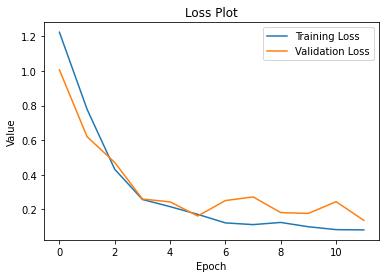

In [15]:
from matplotlib import pyplot as plt
#loss train & validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

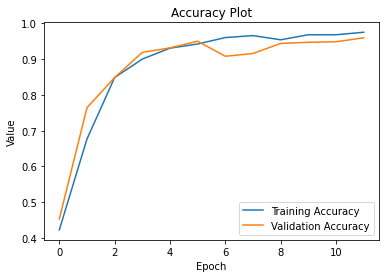

In [16]:
#accuracy train & validation
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

**Langkah 8. Uji Coba Model Klasifikasi Gambar**

Saving WIN_20210626_20_45_35_Pro.jpg to WIN_20210626_20_45_35_Pro.jpg
WIN_20210626_20_45_35_Pro.jpg
paper


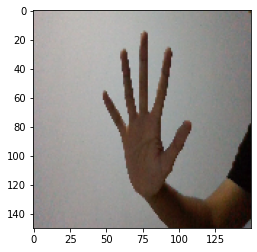

In [17]:
#main driver
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model_seq.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')